<a href="https://colab.research.google.com/github/jamescp/python/blob/main/AnaliseCovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análise dos dados da pandemia de Covid-19 no Maranhão durante os anos de 2020 a 2022.**

Autor: Jamesson Amaral Gomes
> email: jamesson.agomes@gmail.com


In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt # plotting data


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")

In [23]:
#Transformação dos Dados:
df['date'] = pd.to_datetime(df['date'])

#Seleciona somente o estado do Maranhão
df_MA = df[df.state == "MA"]
df_MA.columns

Index(['epi_week', 'date', 'country', 'state', 'city', 'newDeaths', 'deaths',
       'newCases', 'totalCases', 'deathsMS', 'totalCasesMS',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', 'recovered', 'suspects', 'tests',
       'tests_per_100k_inhabitants', 'vaccinated',
       'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants'],
      dtype='object')

Casos e Óbitos atualizados do Maranhão.

In [117]:
#Visualização inicial dos dados 


In [197]:
#Imprime os Casos e Óbitos acumulados desde o início da pandemia no Maranhão
#strftime("%d %b, %Y")
print("DATA:",dt.date.today())
print('CASOS MA:', df_MA['newCases'].sum(),'\nÓBITOS MA:',df_MA['newDeaths'].sum())


DATA: 2022-07-15
CASOS MA: 450515 
ÓBITOS MA: 10913


In [146]:
#ano=df_MA['date'].dt.date.year()


In [185]:
CasosMes = pd.DataFrame(df_MA.groupby(df_MA['date'].dt.strftime('%b/%Y'))['newCases'].sum().sort_values(ascending=True))




In [184]:
(df_MA.groupby(df_MA['date'].dt.strftime('%Y'))
                .agg(
                    casos = ("newCases", "sum"),
                    dias = ("newCases", "count"),
                    num_days=pd.NamedAgg(
                    column="date", 
                    aggfunc=lambda x: (max(x) - min(x)).days) 
))



,casos,dias,num_days
date,,,
2020,200938,287,286
2021,169707,365,364
2022,79870,195,194


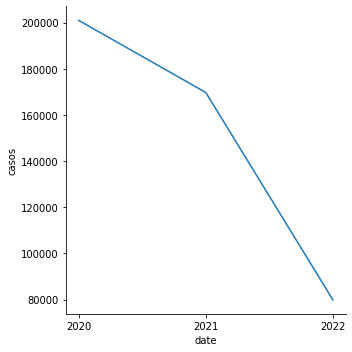

In [141]:
sns.relplot(x='date', y='casos', data=teste, kind = 'line');

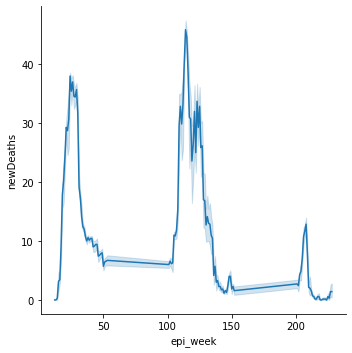

In [20]:
sns.relplot(x='epi_week', y='newDeaths', data =df_MA, kind = 'line');

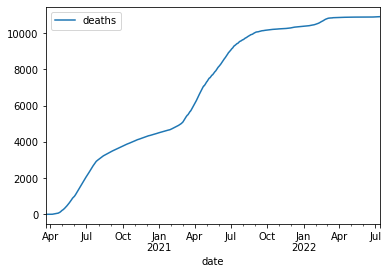

In [26]:
df_MA.plot(x='date', y='deaths');